In [1]:
#!pip install -r requirements_2.txt

In [2]:
import numpy as np
import pandas as pd
from flaml import AutoML
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# read csv file
df = pd.read_csv('travel_times.csv', encoding='gbk')
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Toll,Comments
0,1/6/2012,16:37,Friday,home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,8:20,Friday,work,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,home,51.27,1207.4,82.0,NaN,NaN,NaN,35.9,No,NaN
3,1/4/2012,7:53,Wednesday,work,49.17,132.3,74.2,82.9,NaN,39.8,35.6,NaN,NaN
4,1/3/2012,18:57,Tuesday,home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,8:09,Monday,work,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No,NaN
201,7/14/2011,8:03,Thursday,work,50.90,3123.7,76.2,NaN,7.89,40.1,32.1,Yes,NaN
202,7/13/2011,17:08,Wednesday,home,51.96,132.6,57.5,76.7,NaN,54.2,40.6,Yes,NaN
203,7/12/2011,17:51,Tuesday,home,53.28,125.8,61.6,NaN,NaN,51.9,36.5,Yes,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  188 non-null    float64
 8   FuelEconomy     186 non-null    float64
 9   TotalTime       176 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Toll            174 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(7), object(6)
memory usage: 20.9+ KB


In [5]:
# drop comments column 
df = df.drop('Comments', axis=1)
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Toll
0,1/6/2012,16:37,Friday,home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No
1,1/6/2012,8:20,Friday,work,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,home,51.27,1207.4,82.0,NaN,NaN,NaN,35.9,No
3,1/4/2012,7:53,Wednesday,work,49.17,132.3,74.2,82.9,NaN,39.8,35.6,NaN
4,1/3/2012,18:57,Tuesday,home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,8:09,Monday,work,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No
201,7/14/2011,8:03,Thursday,work,50.90,3123.7,76.2,NaN,7.89,40.1,32.1,Yes
202,7/13/2011,17:08,Wednesday,home,51.96,132.6,57.5,76.7,NaN,54.2,40.6,Yes
203,7/12/2011,17:51,Tuesday,home,53.28,125.8,61.6,NaN,NaN,51.9,36.5,Yes


In [6]:
#fill NaN data
df=df.fillna({'FuelEconomy':round(df["FuelEconomy"].mean(),2),'AvgMovingSpeed':round(df["AvgMovingSpeed"].mean(),2)})
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Toll
0,1/6/2012,16:37,Friday,home,51.29,127.4,78.3,84.80,8.69,39.3,36.3,No
1,1/6/2012,8:20,Friday,work,51.63,130.3,81.8,88.90,8.69,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,home,51.27,1207.4,82.0,81.83,8.69,NaN,35.9,No
3,1/4/2012,7:53,Wednesday,work,49.17,132.3,74.2,82.90,8.69,39.8,35.6,NaN
4,1/3/2012,18:57,Tuesday,home,51.15,136.2,83.4,88.10,8.69,36.8,34.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,8:09,Monday,work,54.52,125.6,49.9,82.40,7.89,65.5,39.7,No
201,7/14/2011,8:03,Thursday,work,50.90,3123.7,76.2,81.83,7.89,40.1,32.1,Yes
202,7/13/2011,17:08,Wednesday,home,51.96,132.6,57.5,76.70,8.69,54.2,40.6,Yes
203,7/12/2011,17:51,Tuesday,home,53.28,125.8,61.6,81.83,8.69,51.9,36.5,Yes


In [7]:
automl_reg = AutoML()
x_train, x_test = df.dropna(subset=['TotalTime']), df[df.TotalTime.isna()]
y_train = df[~df.TotalTime.isna()].TotalTime
automl_reg.fit(x_train, y_train, task="regression", verbose=False)
y_pred = automl_reg.predict(x_test)

INFO:flaml.default.suggest:metafeature distance: 0.25883823295304065
INFO:flaml.default.suggest:metafeature distance: 0.4428393594298161
INFO:flaml.default.suggest:metafeature distance: 0.8700787419951922
INFO:flaml.default.suggest:metafeature distance: 0.36258197003475817
INFO:flaml.default.suggest:metafeature distance: 2.0337427940632002
INFO:flaml.default.suggest:metafeature distance: 0.17263477537587338


In [8]:
df.loc[df.TotalTime.isna(), 'TotalTime'] = y_pred
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     205 non-null    float64
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Toll            174 non-null    object 
dtypes: float64(7), object(5)
memory usage: 19.3+ KB


In [9]:
automl_clf = AutoML()
x_train, x_test = df.dropna(subset=['Toll']), df[df.Toll.isna()]
y_train = df[~df.Toll.isna()].Toll
automl_clf.fit(x_train, y_train, task="classification", verbose=False)
y_pred = automl_clf.predict(x_test)

INFO:flaml.default.suggest:metafeature distance: 0.27147741224402994
INFO:flaml.default.suggest:metafeature distance: 0.27147741224402994
INFO:flaml.default.suggest:metafeature distance: 0.27147741224402994
INFO:flaml.default.suggest:metafeature distance: 0.27147741224402994
INFO:flaml.default.suggest:metafeature distance: 0.27142971478540817
INFO:flaml.default.suggest:metafeature distance: 0.27147741224402994
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info ca

In [10]:
df.loc[df.Toll.isna(), 'Toll'] = y_pred
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     205 non-null    float64
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Toll            205 non-null    object 
dtypes: float64(7), object(5)
memory usage: 19.3+ KB


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال در این قسمت کار با داده‌های گم‌شده به اتمام رسید. مرحله بعدی کار با داده‌های پرت می‌باشد. برای شناسایی داده‌های پرت ابتدا با boxplot، نمودارهای ستون های numerical را رسم میکنیم. 
    </font>
</p>

<AxesSubplot: xlabel='MovingTime'>

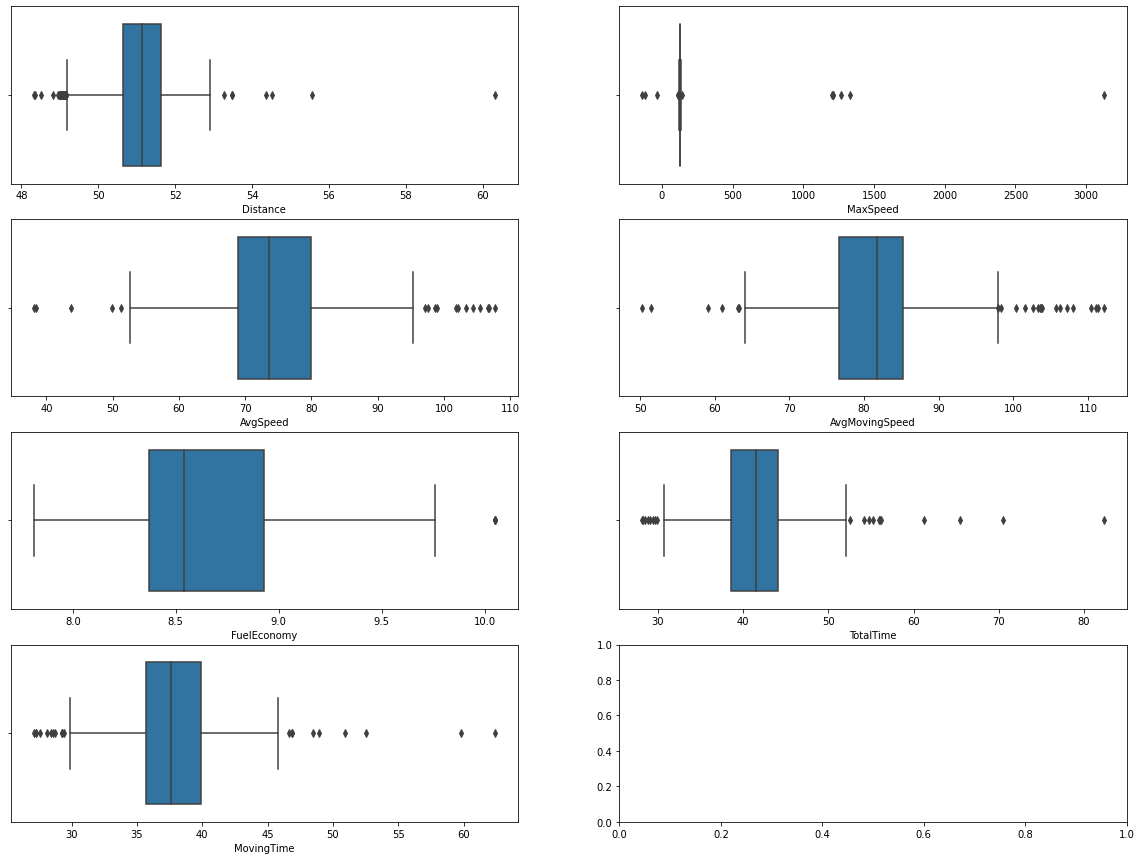

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(20, 15))
sns.boxplot(x=df.Distance, ax = ax[0,0])
sns.boxplot(x=df.MaxSpeed, ax = ax[0,1])
sns.boxplot(x=df.AvgSpeed, ax = ax[1,0])
sns.boxplot(x=df.AvgMovingSpeed, ax = ax[1,1])
sns.boxplot(x=df.FuelEconomy, ax = ax[2,0])
sns.boxplot(x=df.TotalTime, ax = ax[2,1])
sns.boxplot(x=df.MovingTime, ax = ax[3,0])

In [12]:
Q1, Q2, Q3 = df.MaxSpeed.quantile([0.25, 0.5, 0.75])
IQR = Q3 - Q1
outlier_speeddf= df[(df['MaxSpeed']< Q1 - (1.5 * IQR)) | (df['MaxSpeed']> Q3 + (1.5 * IQR))]
outlier_speed = outlier_speeddf["MaxSpeed"].sort_values()
outlier_speed

141    -138.0
204    -120.0
163     -32.5
39      112.2
91      114.4
139     140.9
16     1205.0
2      1207.4
173    1207.5
198    1263.7
100    1328.5
201    3123.7
Name: MaxSpeed, dtype: float64

In [13]:
df['MaxSpeed_is_outlier'] = df['MaxSpeed'].apply(lambda p: (p > Q3 + 1.5 * IQR) or (p < Q1 - 1.5 * IQR))

df.loc[df['MaxSpeed_is_outlier']==True, 'MaxSpeed'] = round(df["MaxSpeed"].mean(),2)
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Toll,MaxSpeed_is_outlier
0,1/6/2012,16:37,Friday,home,51.29,127.40,78.3,84.80,8.69,39.300000,36.3,No,False
1,1/6/2012,8:20,Friday,work,51.63,130.30,81.8,88.90,8.69,37.900000,34.9,No,False
2,1/4/2012,16:17,Wednesday,home,51.27,166.07,82.0,81.83,8.69,41.478561,35.9,No,True
3,1/4/2012,7:53,Wednesday,work,49.17,132.30,74.2,82.90,8.69,39.800000,35.6,No,False
4,1/3/2012,18:57,Tuesday,home,51.15,136.20,83.4,88.10,8.69,36.800000,34.8,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,8:09,Monday,work,54.52,125.60,49.9,82.40,7.89,65.500000,39.7,No,False
201,7/14/2011,8:03,Thursday,work,50.90,166.07,76.2,81.83,7.89,40.100000,32.1,Yes,True
202,7/13/2011,17:08,Wednesday,home,51.96,132.60,57.5,76.70,8.69,54.200000,40.6,Yes,False
203,7/12/2011,17:51,Tuesday,home,53.28,125.80,61.6,81.83,8.69,51.900000,36.5,Yes,False


<AxesSubplot: xlabel='MaxSpeed'>

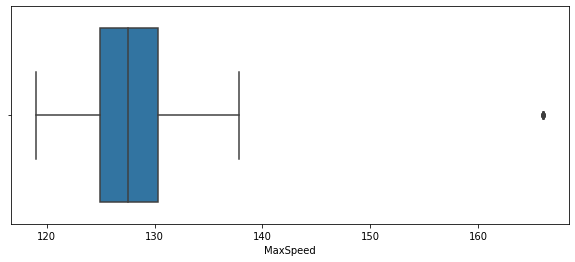

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x=df.MaxSpeed)

In [15]:
df = df.drop('MaxSpeed_is_outlier', axis=1)

In [22]:
df.columns

Index(['Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'Distance', 'MaxSpeed',
       'AvgSpeed', 'AvgMovingSpeed', 'FuelEconomy', 'TotalTime', 'MovingTime',
       'Toll'],
      dtype='object')

In [23]:
# do some preprocessing!
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in ['Date','StartTime','DayOfWeek','Toll']:
  df[i] = label_encoder.fit_transform(df[i])


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in ['Date', 'StartTime', 'DayOfWeek', 'Distance', 'MaxSpeed',
       'AvgSpeed', 'AvgMovingSpeed', 'FuelEconomy', 'TotalTime', 'MovingTime',
       'Toll']:
  df[[i]] = scaler.fit_transform(df[[i]])
  



**model**

In [24]:
y=  df[['GoingTo']]

In [25]:
x = df.copy()
x.drop(columns= ['GoingTo'], inplace= True)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

In [29]:
# modeling
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3,p=2,weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [31]:
# evaluate your model
from sklearn.metrics import f1_score

prediction =f1_score(y_val, y_pred, average='weighted')
prediction

0.9756683512781074

In [33]:
# evaluate model
y_pred = model.predict(X_test)
prediction =f1_score(y_test, y_pred, average='weighted')
prediction

0.927005053834322